In [ ]:
import heapq as hp
from collections import defaultdict,deque

# Best First Search



In [ ]:
def best_first_search(problem):
  start = problem.get_start()
  frontier = [start]
  hp.heapify(frontier)
  visited = set()
  while frontier:
    current = frontier.pop()
    if current.isGoal():
      return current
    for child in problem.getChildren(current):
      if child not in visited or child.cost < current.cost:
        visited.add(child)
        frontier.append(child)
    hp.heapify(frontier)
  return False

# Breadth First Search

In [ ]:
def breadth_first_search(problem):
  start = problem.start
  frontier = deque()
  visited = set()
  frontier.append(start)
  visited.add(start)

  while frontier:
    current = frontier.pop()
    if current.isGoal:
      return current
    for child in problem.getNeighbors(current):
      if child not in visited:
        visited.add(child)
        frontier.push(child)
  return False

# Uniform Cost

In [ ]:
def uniform_cost(problem):
  start = problem.start
  frontier = [start]
  hp.heapify(frontier)
  visited = set()
  visited.add(start)
  while frontier:
    current = frontier.pop()
    if current.isGoal:
      return current
    for child in problem.getNeighbors(current):
      new_cost = current.getCost() + child.getCost()
      if child not in visited or new_cost < current.getCost():
        visited.add(child)
        frontier.push(child)
  return False

# Depth First Search

In [ ]:
def depth_first_search(problem):
  start = problem.start
  stack = deque()
  stack.push(start)
  visited = set()
  while stack:
    current = stack.popleft()
    if current.isGoal:
      return current
    if current not in visited:
      visited.add(current)
      for child in problem.getChildren(current):
        if child not in visited:
          stack.append(child)
  return None
    

# A*


In [ ]:
def aStar(problem):
  start = problem.start
  frontier = [start]
  hp.heapify(frontier)
  visited = set()
  explored_costs = defaultdict(int)
  explored_costs[start] = 0

  while frontier:
    current = frontier.pop()
    if current.isGoal():
      return current
    for child in problem.getNeighbors(current):
      new_cost = explored_costs[current.cost] + child.cost
      if child not in visited or new_cost < explored_costs[child.cost]:
        explored_costs[child] = new_cost
        h = heuristic(child,problem)
        f = h+new_cost
        frontier.push(child,f)
  return None

# Min & Max

In [ ]:
def max_value(state):
  v = float('-inf')
  for successor in state.getSuccessors():
    v = max(v,min_value(successor))
  return v

def min_value(state):
  v = float('inf')
  for successor in state.getSuccessors():
    v = min(v,max_value(successor))
  return v

# Quiz #1 Discussion

## Question #1

1) One disadvantage of the depth-first search algorithm is that it can get trapped in an infinite loop if  the graph has a cycle.

True. DFS can get trapped in an infinite loop if the graph has a cycle since it will always continue to add nodes (or paths) to be explored, since it does not found an end (or road block). Basically, DFS will keep exploring the same nodes over and over again.

## Question #2
2) Suppose you are designing an application to gamble on professional baseball games. You want to use a utility-based agent that places the bets automatically. The requirement for this application is to use an utility function f(N) that balances the risk of losing money r(N) versus the profits p (N), giving equal or more priority to making money. Which of the following should be the the utility function f(N)?

utility function = f(n)
risk of losing money = r(n)
profits = p(n)

requirement: balance the risk of losing money versus the profit giving equal or more priority to making money (basically the priority is profit)

f(N) = a*p (N) + (1-a)* r(N), for 0.5 < a < 1

*** I do not understand why is that the answer ***

## Question #3
Suppose  we run breadth-first search to find a path from Vaslui to Sibiu. Which are the cities to be added to the frontier in Stage 3 of the search ? Provide the answer as a list of names separated by spaces and sorted in alphabetical order. For example: Arad Oradea Sibiu Zerind 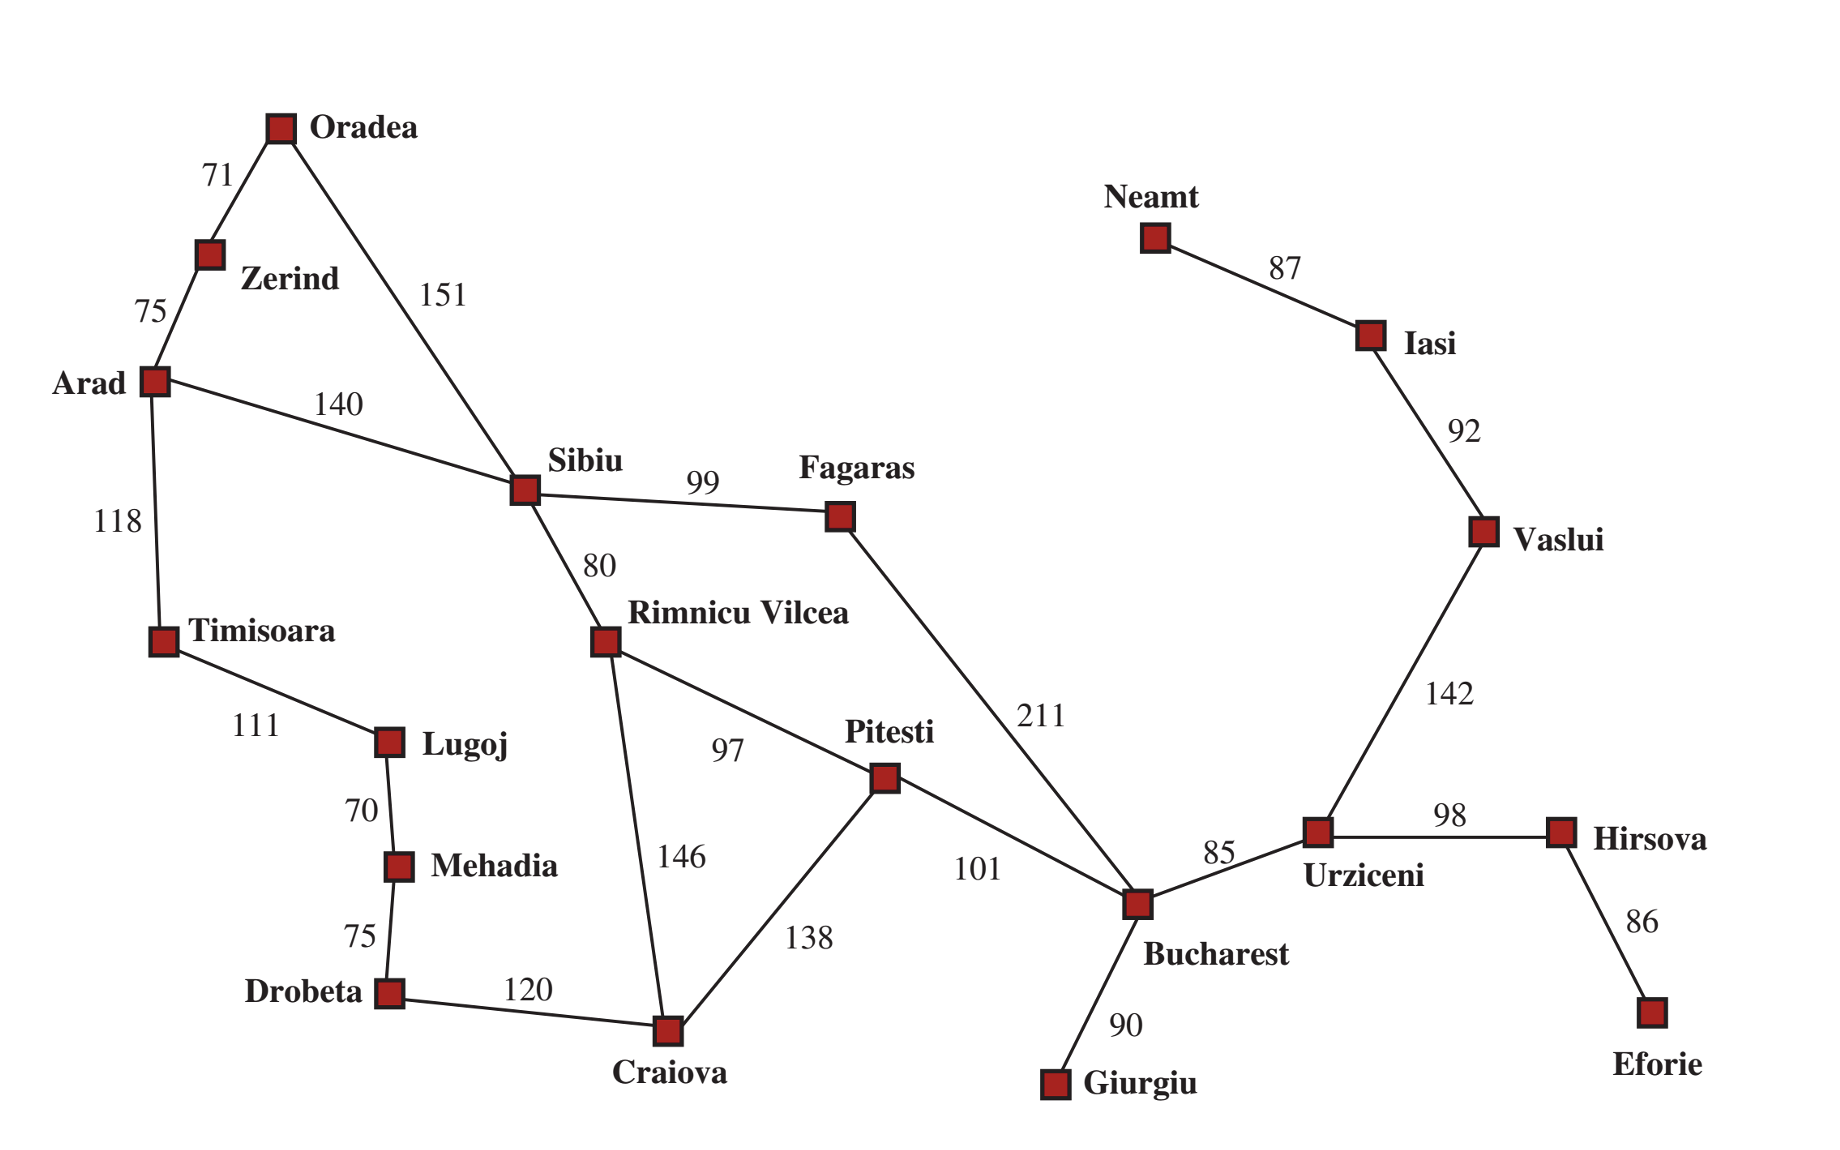

* Stage 1: Frontier = []
* Stage 2: Frontier = [Iasi, Urziceni]
* Stage 3: Frontier = [Bucharest,Hirsova,Neamt]

**IMPORTANT TO REMEMBER THAT STAGE 1 IS THE STARTING POINT**

# Exam #1 Data Structures

In [ ]:
# Global Variables
pos_infinity = float('inf')
neg_infinity = float('-inf')

In [ ]:
import heapq


class Graph:
    def __init__(self):
        super(Graph, self).__init__()
        self.vertices = dict()

    def addNode(self, node):
        self.vertices[node] = []

    def addEdge(self, node, edge):
        if self.hasVertex(node):
            self.vertices[node].append(edge)
        else:
            raise Exception("Node not found: ", node)

    def getVertices(self):
        return [v for v in self.vertices.keys()]

    def getEdges(self, node):
        if self.vertices.get(node):
            return self.vertices[node]
        else:
            raise Exception("Node not found: ", node)

    def hasVertex(self, node):
        return self.vertices.get(node) != None

    def printGraph(self):
        for k in self.vertices.keys():
            print(k)
            print(self.getEdges(k))
            print()


class UndirectedGraph(Graph):
    def __init__(self):
        super(UndirectedGraph, self).__init__()

    def addEdge(self, node, edge):
        v2 = edge[0]
        val = edge[1]
        if self.hasVertex(node) and self.hasVertex(v2):
            self.vertices[node].append(edge)
            self.vertices[v2].append((node, val))
        else:
            raise Exception("Node not found: ", node, v2)


class Stack:
    "A container with a last-in-first-out (LIFO) queuing policy."

    def __init__(self):
        self.list = []

    def push(self, item):
        "Push 'item' onto the stack"
        self.list.append(item)

    def pop(self):
        "Pop the most recently pushed item from the stack"
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the stack is empty"
        return len(self.list) == 0


class Queue:
    "A container with a first-in-first-out (FIFO) queuing policy."

    def __init__(self):
        self.list = []

    def push(self, item):
        "Enqueue the 'item' into the queue"
        self.list.insert(0, item)

    def pop(self):
        """
          Dequeue the earliest enqueued item still in the queue. This
          operation removes the item from the queue.
        """
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the queue is empty"
        return len(self.list) == 0


class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """

    def __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)


class PriorityQueueWithFunction(PriorityQueue):
    """
    Implements a priority queue with the same push/pop signature of the
    Queue and the Stack classes. This is designed for drop-in replacement for
    those two classes. The caller has to provide a priority function, which
    extracts each item's priority.
    """

    def __init__(self, priorityFunction):
        "priorityFunction (item) -> priority"
        self.priorityFunction = priorityFunction      # store the priority function
        PriorityQueue.__init__(self)        # super-class initializer

    def push(self, item):
        "Adds an item to the queue with priority from the priority function"
        PriorityQueue.push(self, item, self.priorityFunction(item))


class TreeNode:
    def __init__(self, label, parent, cost=0, is_leaf=False):
        super(TreeNode, self).__init__()
        self.label = label
        self.parent = parent
        self.cost = cost
        self.children = []
        self.is_leaf = is_leaf
        if self.parent:
            self.parent.__addChild(self)

    def changeCost(self, newCost):
        self.cost = newCost

    def getCost(self):
        return self.cost

    def __addChild(self, node):
        self.children.append(node)

    def getChildren(self):
        return [n for n in self.children]

    def isLeaf(self):
        return self.is_leaf

    def print(self, indent):
        pad = ""
        for i in range(indent * 4):
            pad = pad + " "
        print(pad + self.label)
        for n in self.children:
            n.print(indent + 1)

#Exam #1 Discussion

## Question #1 - Theory
Consider the following MinMax Tree:
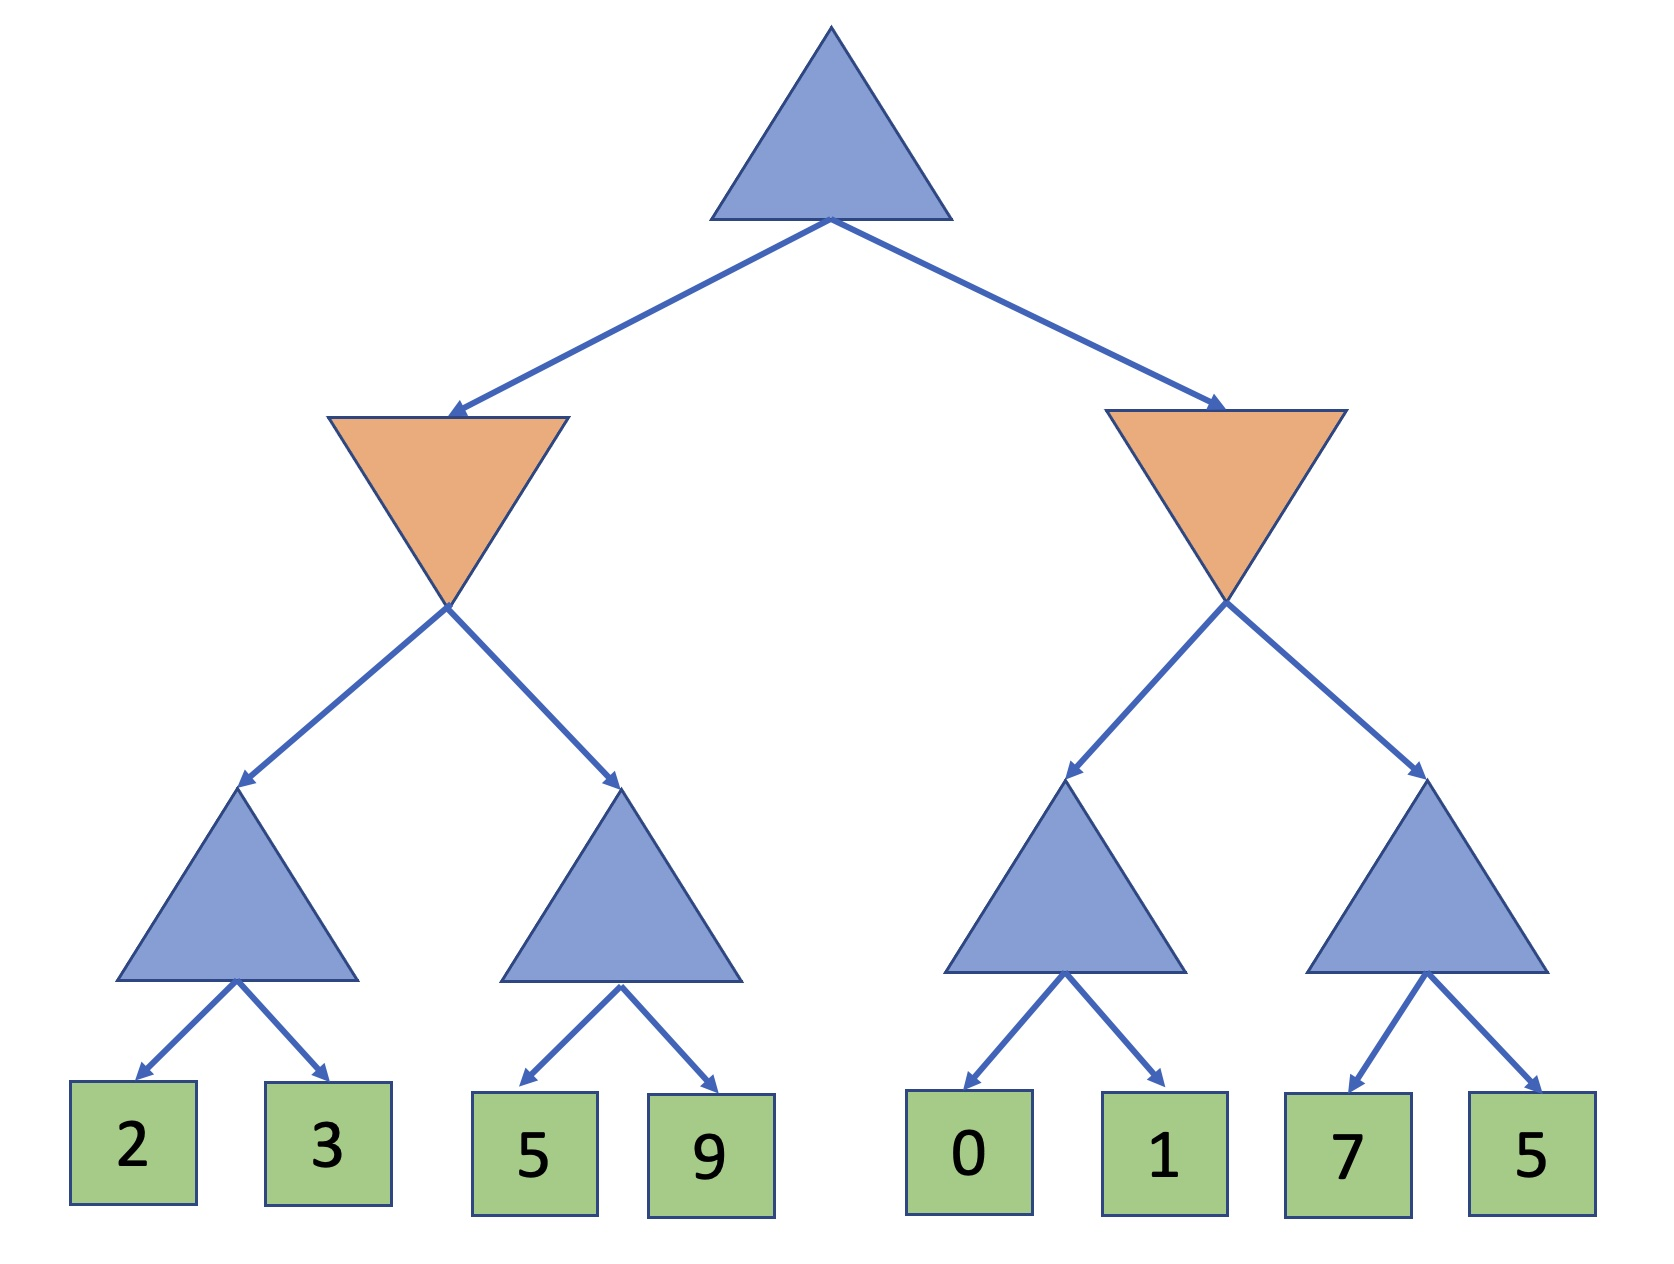

What is the output of the root node?

Max = Blue Squares
Min = Orange Squares

bottom-left-left max chooses 3
bottom-left-right max chooses 9

bottom left min chooses 3

bottom-right-left max chooses 1
bottom-right-right max chooses 7

bottom right min chooses 1

top max chooses 3

**answer = 3**

## Question #2 - Coding

Complete the implementation of a method named minmax that finds the cost of the root node for a minmax game. The method receives one parameter:

T -  a tree node that stores a label, cost, parent, and children (implemented already in file exam1.py)
The method returns one value: the max value for the root using the min-max method. Your task is to implement  the two auxiliar recursive funcitons:

max_value finds the max of a node
min_value finds the min of a node.


Note 1: pos_infinity is the largest positive number in Python. Likewise, neg_infinity is the smallest negative number in Python.

Note 2: You must write the full code for any auxiliar function that you feel would help you complete the problem.

[Test Cases](https://online.upr.edu/pluginfile.php/3322612/question/questiontext/4084985/3/60382357/minmax.pdf)

In [ ]:
def minmax(T:TreeNode):
    val = max_value(T)
    return val
    
def max_value(T):
  if not T.children:
    return T.cost
  v = neg_infinity
  for child in T.children:
    v = max(v,min_value(child))
  return v
  

def min_value(T):
    if not T.children:
      return T.cost
    v = pos_infinity
    for children in T.children:
      v = min(v,max_value(children))
    return v


def min_value(T):
  if not T.children:
    return T.cost
  vertice = pos_infinity
  for child in T.children:
    vertice= min(vertice, max_value(child))
  return vertice

### Question #2 - Test Cases

In [ ]:
# Test Case #1 
N1 = TreeNode('1', None)
N2 = TreeNode('2', N1)
N3 = TreeNode('3', N1)
N4 = TreeNode('4', N2, 10, True)
N5 = TreeNode('5', N2, 8, True)
N6 = TreeNode('6', N3, 4, True)
N7 = TreeNode('7', N3, 5, True)

print('Expected Result:',8)
print('Obtained Result:',minmax(N1))

In [ ]:
# Test Case #2
N1 = TreeNode('1', None)
N2 = TreeNode('2', N1)
N3 = TreeNode('3', N1)
N4 = TreeNode('4', N2)
N5 = TreeNode('5', N2)
N6 = TreeNode('6', N3)
N7 = TreeNode('7', N3)
N8 = TreeNode('8', N4, 10, True)
N9 = TreeNode('9', N4, 9, True)
N10 = TreeNode('10', N5, 100, True)
N11 = TreeNode('11', N5, 8, True)
N12 = TreeNode('12', N6,1,True)
N13 = TreeNode('13', N6,2,True)
N14 = TreeNode('14', N7,20,True)
N15 = TreeNode('15',N7,4,True)


print('Expected Result:',10)
print('Obtained Result:',minmax(N1))

In [ ]:
# Test #3
N2 = TreeNode('2', N1)
N3 = TreeNode('3', N1)
N4 = TreeNode('4', N2,1,True)
N5 = TreeNode('5', N2,2,True)
N6 = TreeNode('6', N3,30,True)
N7 = TreeNode('7', N3,20,True)

## Question #3 - Theory

Suppose  we run breadth-first search to find a path from Zering to Bucharest. Which are the cities to be added to the frontier in Stage 4 of the search ? Provide the answer as a list of names separated by spaces and sorted in alphabetical order. For example: Arad Oradea Sibiu Zerind 

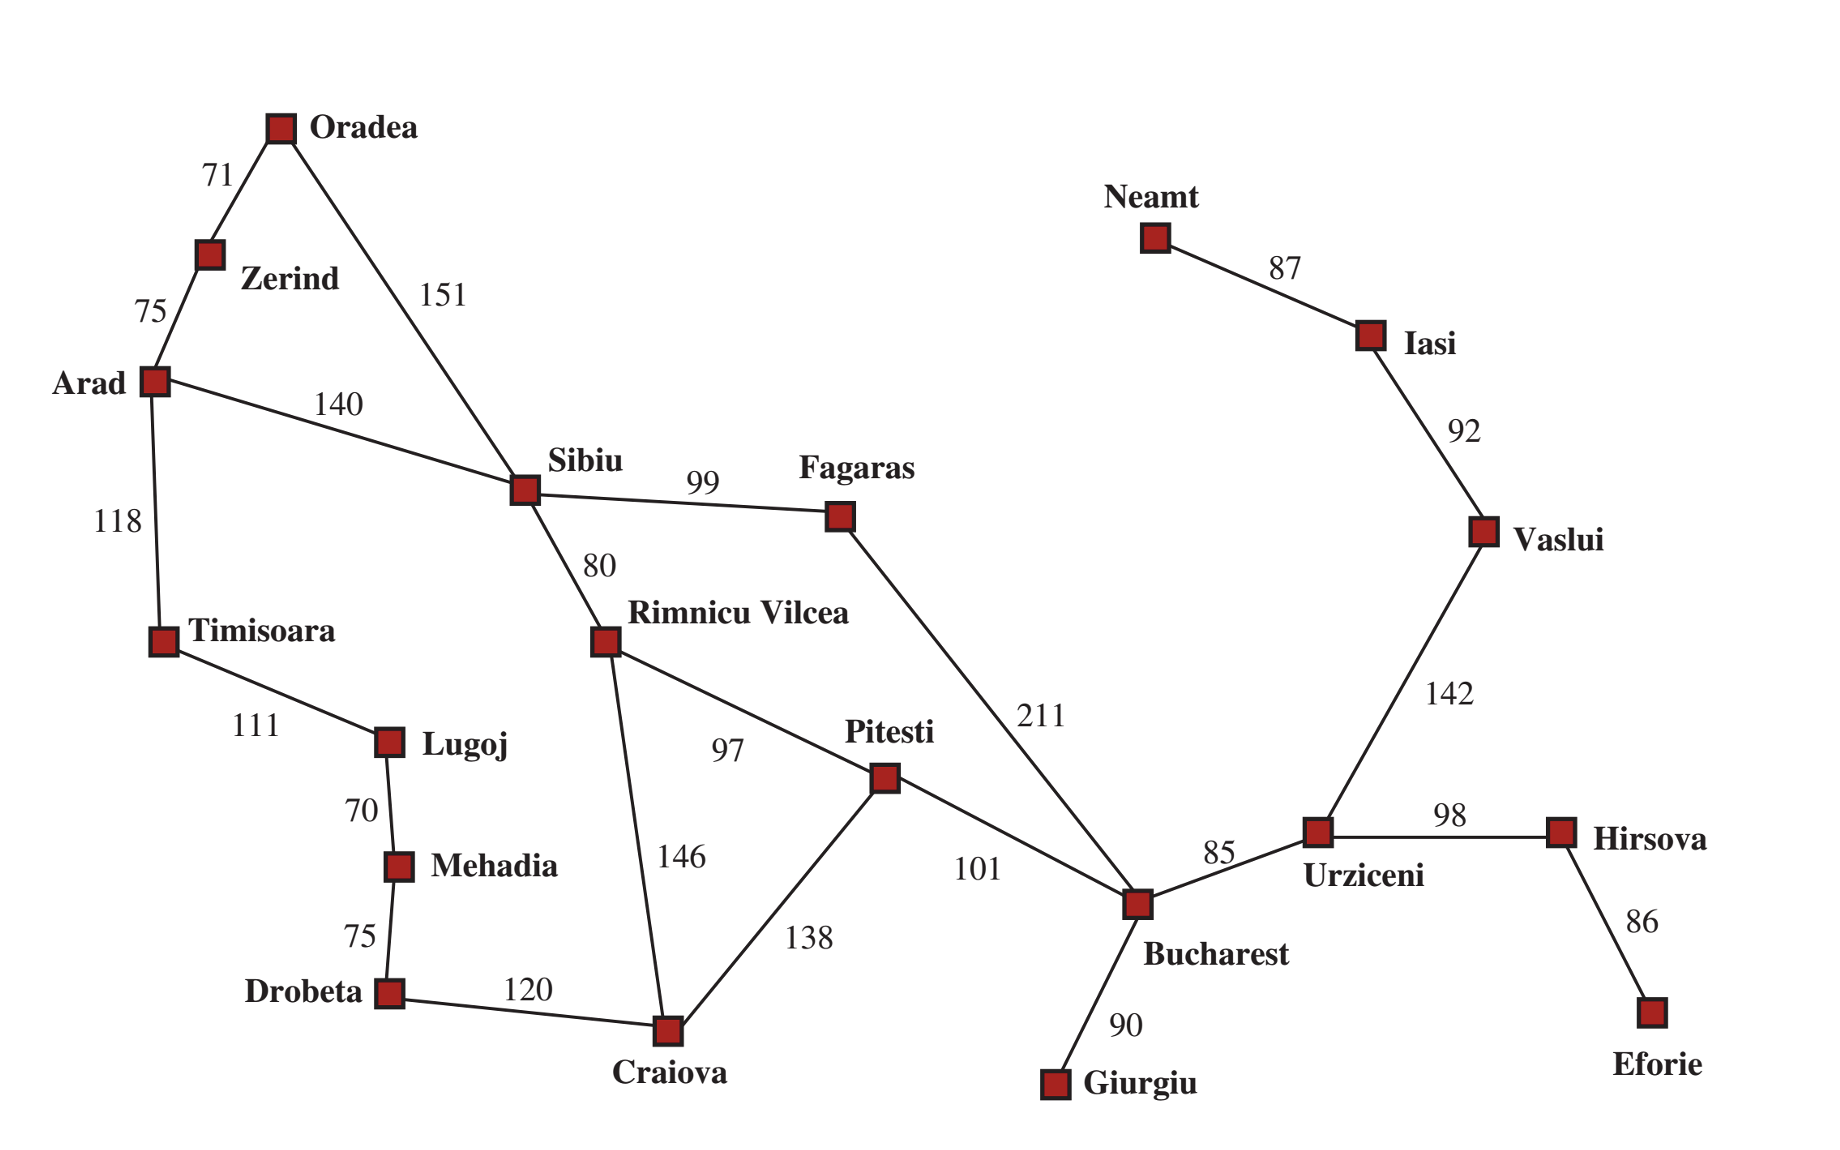

Source: Zerind
Destination: Bucharest

* Stage 1: frontier = [], frontier is empty since we currently are in the source
* Stage 2: frontier = [Arad,Oradea]
* Stage 3: frontier = [Timisoara,Sibiu]
* Stage 4: frontier = [Fagaras,Lugoj,Rimnicu Vilcea]

**Answer: Fagaras Lugoj Rimnicu Vilcea**

## Question #4 - Theory
Consider the 4-corners pacman problem from project 1. Suppose that the game has four ghosts moving around. Let M(n, c_i) be the Manhattan distance from the current node n to a corner c_i . Let G(c_i) be a heuristic that indicates the expected number of ghosts that are 10 steps from corner c_i. Which of the following would be a good estimate function f(n, c_i) to pick the state to get to the next unvisited corner with A* search.

a.f(n, c_i) = 0.7*M(n, c_i) + 0.3*G(c_i)

b.f(n, c_i) = G(c_i) 

c.f(n, c_i) = M(n, c_i) 

d.None of the alternatives is good.

e.f(n, c_i) = M(n, c_i) *G(c_i)

f.All the alternatives are equally good


**Correct Answer: a.f(n, c_i) = 0.7*M(n, c_i) + 0.3*G(c_i)**

Why is that the correct answer?

## Question #5 - Coding
Write a method named ufs that finds the minimum cost path and numeric cost from node X to a node Y, using uniform cost search (best first search). Recall that this method visits neighbors based on priority of minimum cost of the edge between nodes. The method receives three parameters:

G -  undirected Graph (implemented already in file exam1.py)
start - starting node 
goal - goal node
The method returns two values: a) a list with the path of nodes from start to goal, and the b) the numeric cost of the path. 

Note 1: Remember that in best first search a node might be reached more than once because we might find a better path to it.

Note 2: You must write the full code for any auxiliar function that you feel would help you complete the problem.

In [ ]:
def ufs(graph: UndirectedGraph, start, goal):
    frontier = PriorityQueue()
    frontier.push((start,[],0),0)
    explored = set()
    explored_costs = defaultdict(int)
    explored_costs[start] = 0
    while not frontier.isEmpty():
        current_state,current_path,current_cost = frontier.pop()
        if current_state == goal:
            return current_path + [current_state], current_cost
        for neighbor in graph.getEdges(current_state):
            new_cost = explored_costs[current_state] + neighbor[1]
            if neighbor[0] not in explored or new_cost < explored_costs[current_state]:
                explored_costs[neighbor[0]] = new_cost
                frontier.push((neighbor[0],current_path+[current_state],current_cost+neighbor[1]),new_cost)
    return None

### Question #5 - Test Cases

## Question #6 - Coding
Write a method named dfs that finds the path and cost from node X to a node Y using depth-first search. The method receives three parameters:

1. G -  undirected Graph (implemented already in file exam1.py)
2. start - starting node 
3. goal - goal node

The method returns two values: 
a.  a list with the path of nodes from start to goal, and the 
b. the numeric cost of the path. 

In [ ]:
def dfs(graph:UndirectedGraph, start, goal):
    frontier = Stack()
    explored = set()
    frontier.push((start,[],0))
    while not frontier.isEmpty():
        current_state,current_path,current_cost = frontier.pop()
        if current_state == goal:
            return current_path + [current_state],len(current_path)
        if current_state not in explored:
            explored.add(current_state)
            for neighbor in graph.getEdges(current_state):
                if neighbor not in explored:
                    frontier.push((neighbor[0],current_path+[current_state], current_cost + neighbor[1]))
    return None

### Question #6 - Test Cases

## Question #7 - Theory

Consider the following MinMax Tree:

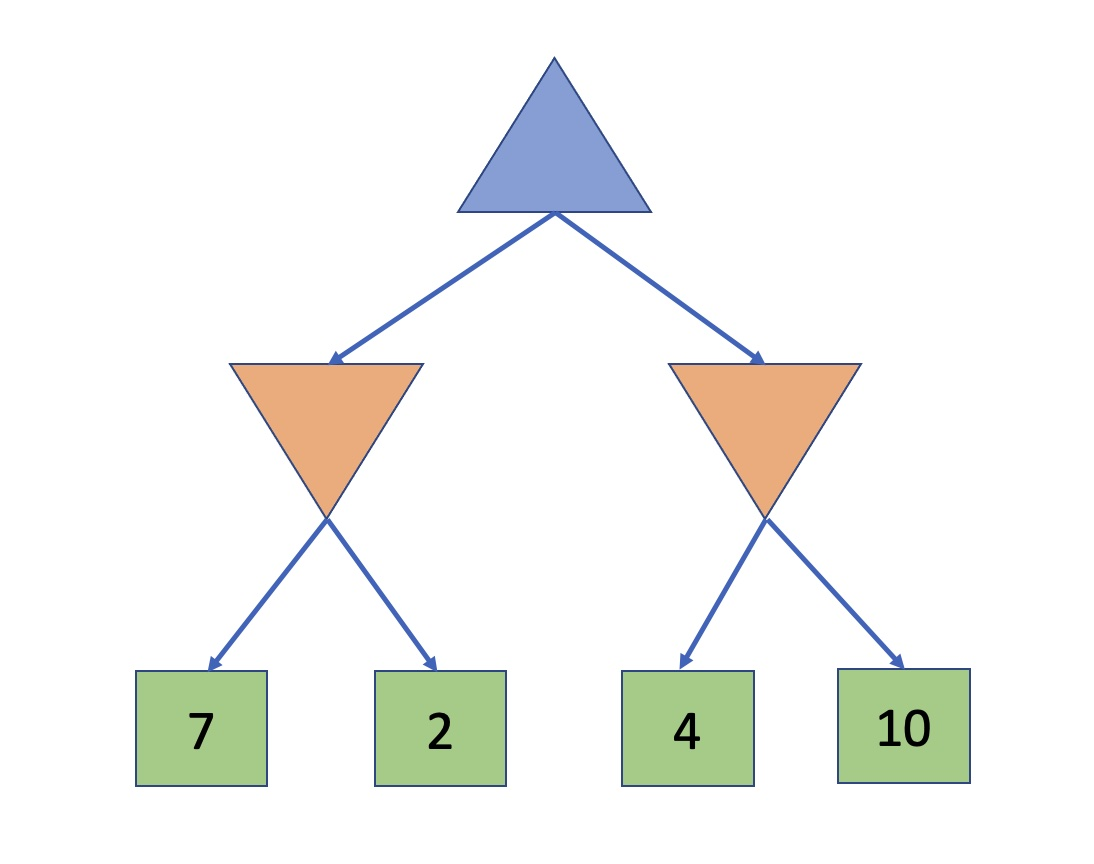

What would be the output of the root node?

Blue = Max Node
Orange = Min Node

Bottom Left Min chooses 2
Bottom Right Max chooses 4

Root Max Node chooses 4

**Answer: 4**

## Question #8 - Theory


Consider the following MinMax Tree:

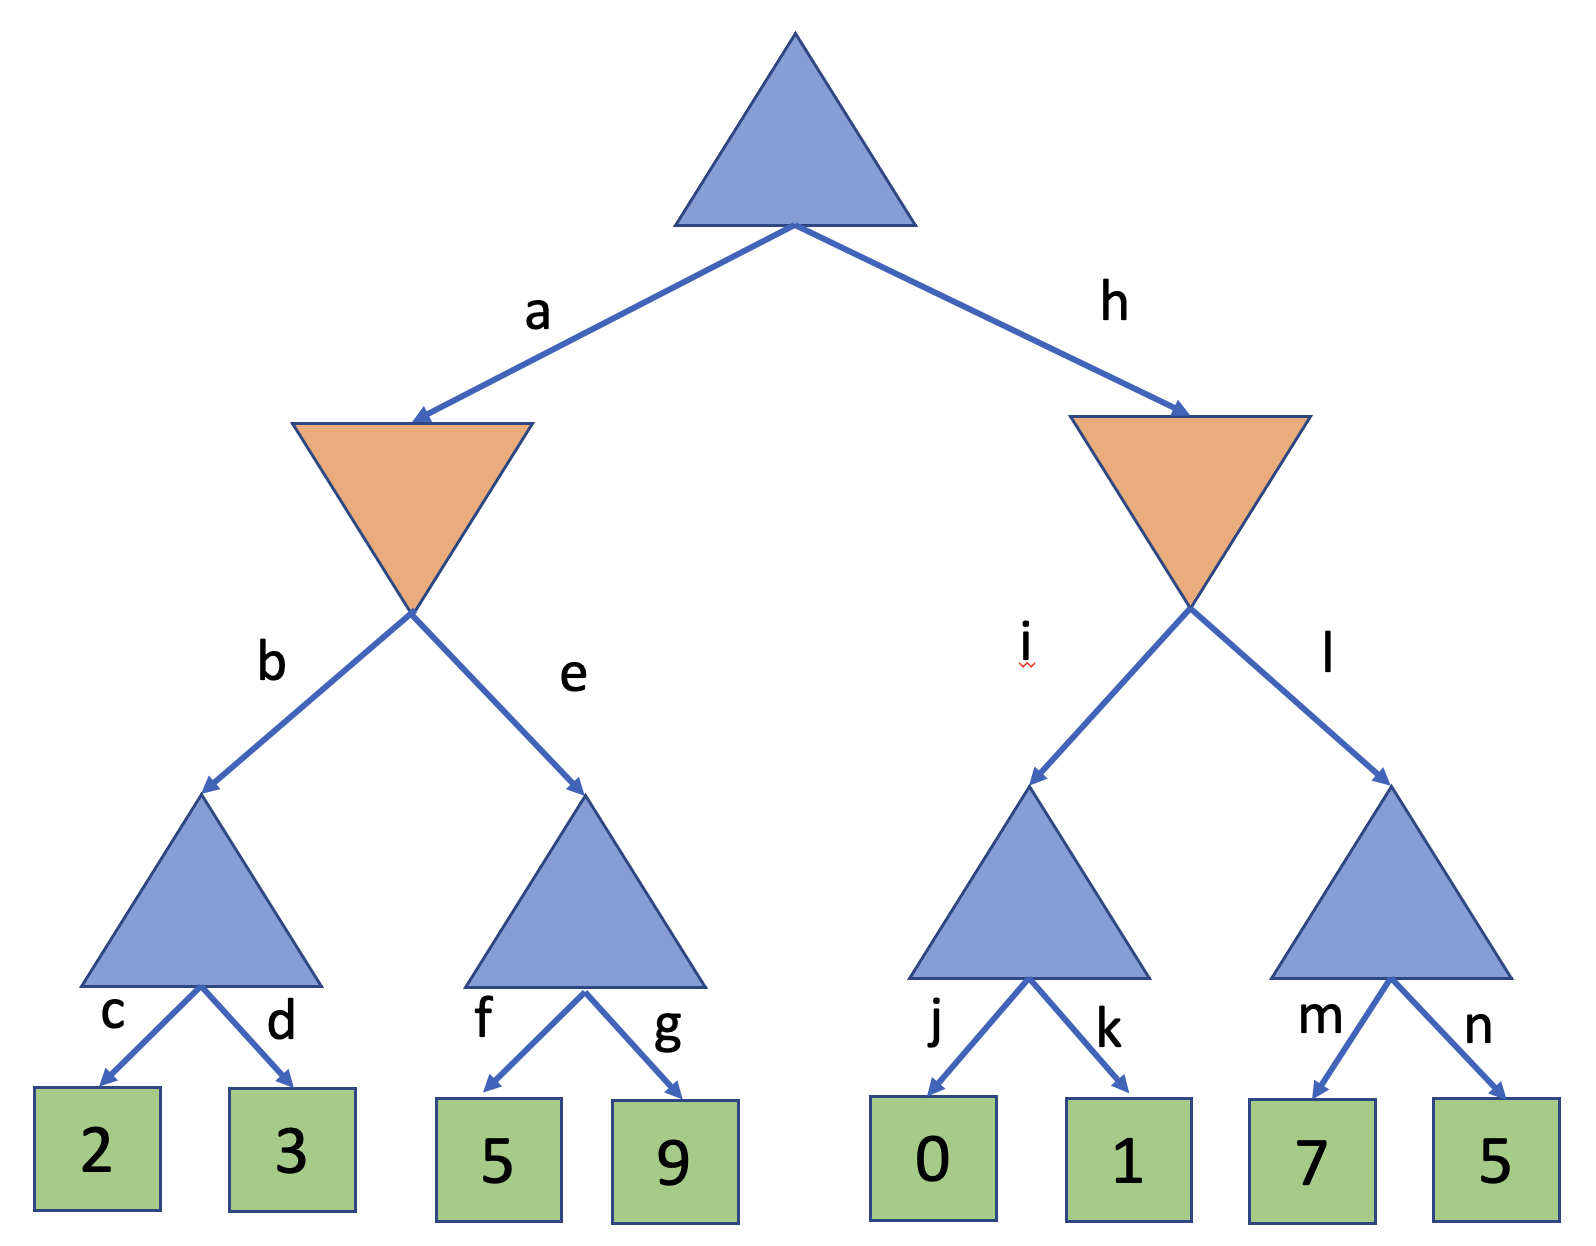

Which edges will not be visited as result of Alpha-Beta pruning? Mark all that apply


* a. g
* b. n
* c. i
* d. l
* e. k
* f. m
* g. j
* h. d

Orange = Min Node
Blue = Max Node

alpa = -inf
beta = inf



**answer = G,N,L,M**
* Review this material